## Layers

In [1]:
# import packages
import sys
import os
from dotenv import load_dotenv
from IPython.display import display, HTML
import json
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from datetime import datetime
from urllib.parse import urlparse
from pathlib import Path

import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import pandas as pd


# Load environment variables from .env file
load_dotenv()

# import the API builder
sys.path.append(os.path.abspath("../../"))
from scoutmaster.api import ScoutMasterAPI

In [2]:
# Scoutmaster API - Credentials
client_id = os.getenv('SM_CLIENT_ID')
client_secret = os.getenv('SM_CLIENT_SECRET')
project_id = os.getenv('SM_PROJECT_ID')
dev = os.getenv("DEV")

# Scoutmaster API - Init
SM_API = ScoutMasterAPI(dev)
SM_API.authenticate(client_id=client_id, client_secret=client_secret)

✅ Successfully authenticated ScoutMaster API
HOST: https://dev-api.scoutmaster.nl/v2/


In [3]:
df_fields = SM_API.fields(project_id)
df_fields 

,id,name,address,area_ha,geometry,created_at,deleted_at,properties,updated_at,country_code,reference_point
0,39507fbd-6f0e-49e5-bdb2-f36d964cffa1,bieten rombouts 25,"{'road': 'Brede Balrouw', 'state': 'Noord-Brab...",3.13,"POLYGON((4.57549667 51.58900725,4.57435942 51....",2025-07-30T13:42:43.496+00:00,None,{'description': 'A description of the field'},2025-07-30T13:42:43.496+00:00,None,None
1,fb34d37d-baa1-4e8a-a8cd-5a5f60c5e7c3,KNVB zeist - veld 2,"{'road': 'Woudenbergseweg', 'town': 'Zeist', '...",0.79,"POLYGON((5.2931019551254 52.089336855448,5.291...",2025-08-14T12:33:40.256+00:00,None,{'description': 'A description of the field'},2025-08-14T12:33:40.256+00:00,None,None


In [4]:
df_layer_types = SM_API.layer_types()
df_layer_types 

,id,name,type,abbreviation,group_name,layer_source,preview_image
0,0685e79a-d5ca-43f8-a634-6068bdbacfab,Biomassa,index,WDVI,soilzones,"{'id': 'f33a1b97-cad2-4f3d-a092-187bb8071fa1',...",https://bioscope-products.s3.eu-central-1.amaz...
1,204ad08c-0172-442a-9c15-79f09167b605,RGB,rgb,RGB,soilzones,"{'id': '8a5b0bc3-8e02-4112-a4a8-b05833a3a999',...",https://bioscope-products.s3.eu-central-1.amaz...
2,0a0e0317-8dad-4118-8150-f7a29732cd65,Scouting,vector,SCOUT,Vegetation maps (HD),"{'id': 'f33a1b97-cad2-4f3d-a092-187bb8071fa1',...",https://bioscope-products.s3.eu-central-1.amaz...
3,02efea93-d770-4d86-b22c-0d9a451a276a,R,band,R,soilzones,"{'id': '8a5b0bc3-8e02-4112-a4a8-b05833a3a999',...",https://bioscope-products.s3.eu-central-1.amaz...
4,4a45fbe2-b6ab-4e29-b658-b1e69d39ac00,G,band,G,soilzones,"{'id': '8a5b0bc3-8e02-4112-a4a8-b05833a3a999',...",https://bioscope-products.s3.eu-central-1.amaz...
5,4eedc862-e816-42cf-8e04-a21a0c40c73c,B,band,B,soilzones,"{'id': '8a5b0bc3-8e02-4112-a4a8-b05833a3a999',...",https://bioscope-products.s3.eu-central-1.amaz...
6,1afbec0c-fc04-4edf-a68d-9a0a6e0ecca0,SoilZones 5,vector,ZONES,soilzones,"{'id': '9fba7dd8-7fac-477f-88bb-f2b6b5bd93a9',...",https://bioscope-products.s3.eu-central-1.amaz...
7,d502f286-4e49-4bcc-a921-8d98c4da146c,SoilZones 3,vector,ZONES,soilzones,"{'id': '9fba7dd8-7fac-477f-88bb-f2b6b5bd93a9',...",https://bioscope-products.s3.eu-central-1.amaz...
8,51c039a3-865c-42d9-bca8-2d94081d9108,SoilZones 4,vector,ZONES,soilzones,"{'id': '9fba7dd8-7fac-477f-88bb-f2b6b5bd93a9',...",https://bioscope-products.s3.eu-central-1.amaz...
9,502ff6f2-d14a-4e4d-a54c-ba14b1f84387,Stikstof,index,CI-red,Vegetation maps (HD),"{'id': 'f33a1b97-cad2-4f3d-a092-187bb8071fa1',...",https://bioscope-products.s3.eu-central-1.amaz...


In [5]:
layer_type = df_layer_types.iloc[0]
layer_type_id = layer_type["id"]

field = df_fields.iloc[0]
field_id = field["id"]

In [6]:
print("FIELD:", field["name"], "ID:", field["id"])
print("LAYERTYPE:", layer_type["name"], "ID:", layer_type_id)

FIELD: bieten rombouts 25 ID: 39507fbd-6f0e-49e5-bdb2-f36d964cffa1
LAYERTYPE: Biomassa ID: 0685e79a-d5ca-43f8-a634-6068bdbacfab


In [7]:
df_layers = SM_API.layers(field_id, layer_type_id)
df_layers 
# df_layers["updated_at"] = pd.to_datetime(df_layers["updated_at"], utc=True, errors="coerce")

# # Define 'today' in UTC
# today = pd.Timestamp(datetime.now().date()).tz_localize("UTC")

# # Filter rows where updated_at is today or later
# df_layers_today = df_layers[df_layers["updated_at"] >= today]
# df_layers_today

,id,layer_stack_id,created_at,layer_crs,updated_at,path,acquired_at,layer_timestamp,layer_type,layer_statistics
0,821,1124,2025-09-02T14:07:40.831Z,None,2025-09-02T14:07:40.831Z,https://soildata-terrasphere.s3.eu-central-1.a...,2025-07-24T10:02:00.000Z,2025-07-24T10:02:00.000Z,"{'id': '0685e79a-d5ca-43f8-a634-6068bdbacfab',...","{'min': 0.02903999947011471, 'UCL_95': 0.10199..."


### plot vectors

-1.0


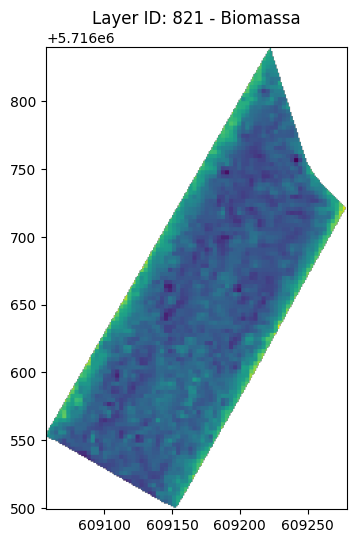

In [8]:
dn_colors = {1: "#D1F2FF", 2: "#FF4700", 3: "#8ED547"}
for idx, row in df_layers.iterrows():
    file_path = row["path"]
    layer_type_name = row['layer_type']['name']
    parsed = urlparse(file_path)
    # Use the path part only
    extension = Path(parsed.path).suffix.lower().replace(".", "")
    if extension == "geojson":
        try:
            # Read GeoJSON
            gdf = gpd.read_file(file_path)
            
            # Optional: color by DN if the property exists
            if "DN" in gdf.columns:
                gdf["plot_color"] = gdf["DN"].map(dn_colors)
            else:
                gdf["plot_color"] = "#AAAAAA"  # fallback gray

            # Plot
            gdf.plot(color=gdf["plot_color"], edgecolor="black", alpha=0.7)
            plt.title(str(row.get("acquired_at", f"Layer {idx}")))
            plt.axis("equal")  # maintain aspect ratio
            plt.show()

        except Exception as e:
            print(f"⚠️ Failed to plot {file_path}: {e}")
    elif extension == "tif" or extension == "tiff":
        # Open the GeoTIFF directly from URL
        with rasterio.open(file_path) as src:
            print(src.nodata)
            fig, ax = plt.subplots(figsize=(8, 6))
            show(src, ax=ax, cmap='viridis')
            ax.set_title(f"Layer ID: {row['id']} - {layer_type_name}")
            plt.show()